#Milestone Project 3

##Part 1: Planning

### Task 1: Choose a Research Question

For this task, we're going to focus on formulating a research question with a compelling, real-world application that can be answered using a machine learning model. There is no specific area or topic that you're required to investigate.  In fact, it's usually more interesting if you're exploring your own personal interests or answering a question related to the industry where you will direct your job search.

**The most important rule of research questions is to actually have one.** Many, many projects suffer because the learner begins with a vague, general sense of direction but doesn’t have a clear, specific question to answer.  For example, you might wish to complete your Milestone 3 project about shopping habits at a particular online retailer, but the data you use and the ML model you develop will depend on your specific research question.  

For example, you’ll need different methods to answer the question “Are customers who see a new version of the store website more likely to make a purchase?” than to answer the question, “What products do customers often purchase in the same order?”

**The second most important rule of research questions is not to get in over your head.**  If you are really interested in your topic, you will probably have lots and lots of research questions that you are tempted to answer with this project.  Do not do it!  For this project, you will answer one (and only one) specific, well-defined question.  

Research is not a mechanical process and often doesn’t proceed in a straight line, but it's almost always best to spend time at the start of your project developing and refining a core question that will motivate your study: it makes every aspect of the research process easier.


**Although you may need to try a lot of things on your way to answering your research question, please remove any code that is not part of your finished project before submitting.**

**This notebook should be able to run from start to finish without error.** 


**Step 1** 

Brainstorm three industries or topics that you most interested in exploring for this project.

**Step 1 Answer**

1. Psychology
2. Insurance
3. Music

**Step 2** 

Pick the industry or topic from Step 1 that interests you the most.  Brainstorm three potential research questions that you could answer for this project.  **Right now, the question will be fairly broad.  You will refine your research question once you select your data set.**  Each potential research question should have the following qualities:

*   It's a question, not a statement.
*   It has a real-world application with clear stakeholder(s).
*   You can answer the question using a machine learning model.
*   You know (or have a pretty good idea) which machine learning model will be appropriate for your research question.
*   You have a pretty good idea how to find the data that will answer your question (more on that later).
*   You don't know the answer in advance. 

**Step 2 Answer**

Music.
1. Can I use ML to predict which song would be a hit or not?
2. Can I use ML to predict if an Indie song will be a hit?
3. Can I use ML to predict if I will like a song or not?
These are all logistic regression problems 

**Step 3** 

Rank your three potential research questions from Step 2 in order from one to three with one being your top choice and two and three being backup choices.  

When ranking your research questions, think both about what interests you the most and what will be practical.  How well-defined is each research question?  How difficult will it be to find data to answer that question?  How difficult will it be to wrangle the data?  How confident do you feel about selecting an ML model to answer the research question?

This is a great time to involve your instructor, who can provide guidance on revising your ideas in Step 2 and identifying your top and backup research questions. 

**Step 3 Answer**

I found a spotify dataset of 19000 songs and decided with ranking as one of the features and decided it would be nice to predict based on available song features:  If I could use ML to predict which songs will be a hit. 



**My Milestone Project 3 Research Question Is:**

Can I use ML to predict whether a song will rank in the top 10%

### Task 2: Select a Data Set 

Once you have a research question, you need to find a publically available data set that will allow you to answer it.


There are lots of potential sources.  A few that are particularly useful are:

Awesome public data sets: https://github.com/awesomedata/awesome-public-datasets

Kaggle: https://www.kaggle.com/datasets

UC Irvine Machine Learning: https://archive.ics.uci.edu/ml/datasets.php

Definitely Google around for more data sources and ask your peers and instructor!
 


**Step 1** 

Find at least one data set that you can use to answer your research question from Task 1.  

Your data set should:
* Be at least 100 records long.  You'll need a lot more records if you want to use a neural network.  
* Be publicly available on the Internet. Don't collect your own data.  Don’t use data that can’t be attributed to a reputable source.
* Have at least four features (remember that, when modeling text data, each word is a feature).

This is another good opportunity to check in with your instructor and make sure you are on the right track.  




**Step 1 Answer**

Write a short description of your data set and it's location (URL or where you saved it on your computer) here.

This is a data set of 19000 songs taken from ../input/19000-spotify-songs.  Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .
duration_ms: The duration of the track in milliseconds.

A dictionary could be found here.  https://www.kaggle.com/code/mikedejoya/spotify-popularity-prediction-ml-practice/edit

Some of the code was adapted from the work of PELINSS on Kaggle.

**Step 2** 

Refine your research question so it applies to your specific data set.  

For example, if your broad research question was "How can I use machine learning to group customers by what they buy?" and you select a data set that contains Target holiday shopping orders, your refined research question might be something like, "Can I group Target customers by their holiday shopping orders?"

**At this point, it is possible that you will discover that you can't find a data set and research question that work well together.  Work with your instructor to either modify your current question or select one of your backup research questions above. To complete this task successfully, you will need to have selected a research question AND have a data set that can be used to answer it.**


**Step 2 Answer**

Write your refined research question here.

Can I predict that a song will be ranked in the top 10% based on the features of the song?

### Task 3: Conduct Exploratory Data Analysis 

The purpose of exploratory data analysis at the project planning stage is to make sure that your data will answer your research question. It is possible to do everything correctly during this step and still hit a roadblock when you actually run your ML model, but it’s much less likely.


**Step 1** 

Determine the type(s) of machine learning model(s) you will use to answer your research question.  There might be only one type of model that will work, or you might have a number of models to choose from.

In [1]:
# Uploading dataset csv file for EDA

from google.colab import files
spotify = files.upload()

Saving song_data.csv to song_data (1).csv


In [2]:
# Importing applications and packages that will be needed to read, do visualizations, train, validate and test and compute for accuracy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

In [3]:
spotify=pd.read_csv('song_data.csv')
spotify.head(5)


,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
sorted_df = spotify.sort_values('song_popularity', ascending = False).head(100)
sorted_df.head(25)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7568,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
15091,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11665,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11697,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
5593,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
4299,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
16497,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17590,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671


In [5]:
spotify.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

Feature Explanations

Dataset contains 18835 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .
duration_ms: The duration of the track in milliseconds.
key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
song_popularity: Song ratings of spotify audience.
liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

In [6]:
spotify.shape

(18835, 15)

Text(0.5, 1.0, 'Histogram plot')

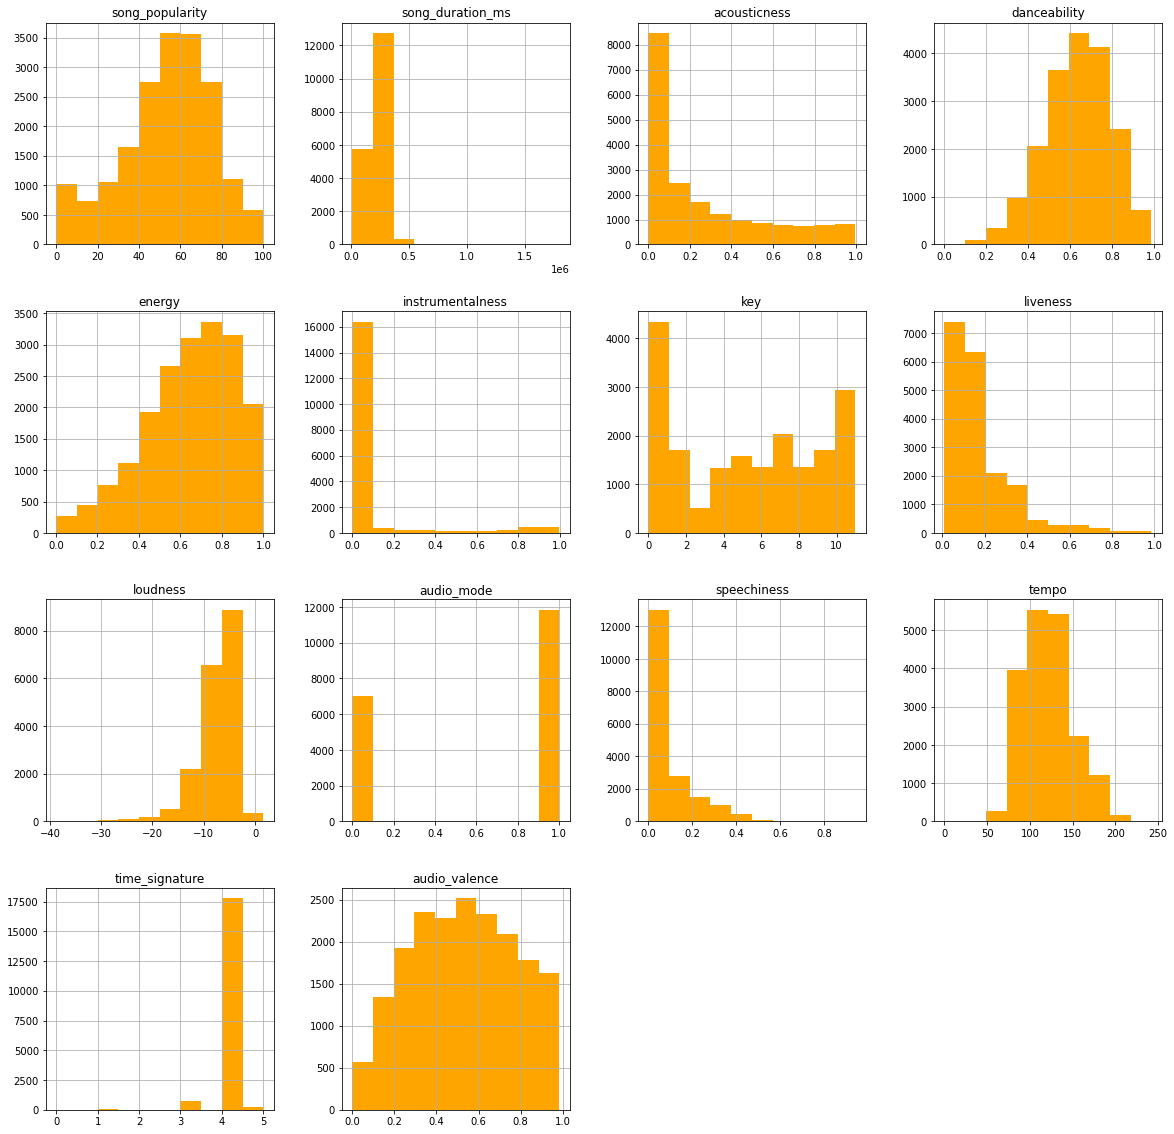

In [7]:
spotify.hist(figsize=(20,20), color = 'orange')
plt.title("Histogram plot", size=20, weight='bold')

In [8]:
# Every feature is on a different scale and since we will use logistical regression I will regularize the data with StandardScaler

spotify.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


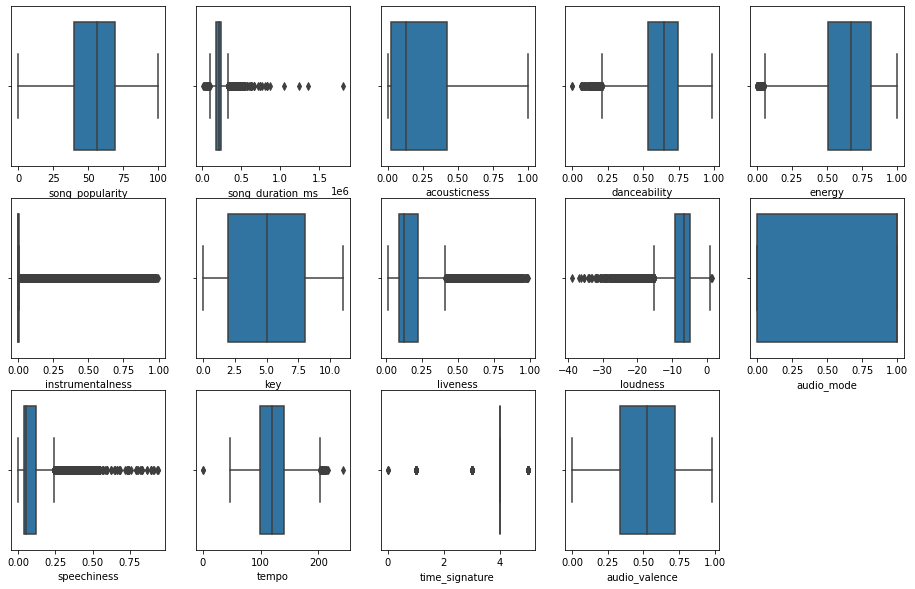

In [9]:
spotify = spotify.drop(['song_name'], axis=1)

plt.figure(figsize=(16, 10))

for i in range(len(spotify.columns)):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(spotify[spotify.columns[i]])

plt.show()

In [10]:
# there are no null entries

spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


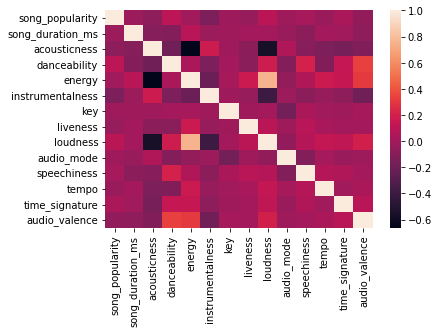

In [11]:
#This shows a handful of high negative correlation and a good correlation between liveliness and danceability

sns.heatmap(spotify.corr(),
            xticklabels=spotify.columns,
            yticklabels=spotify.columns
           )

There is a high correlation between energy an loudness and a high negative correlation for both with acousticness

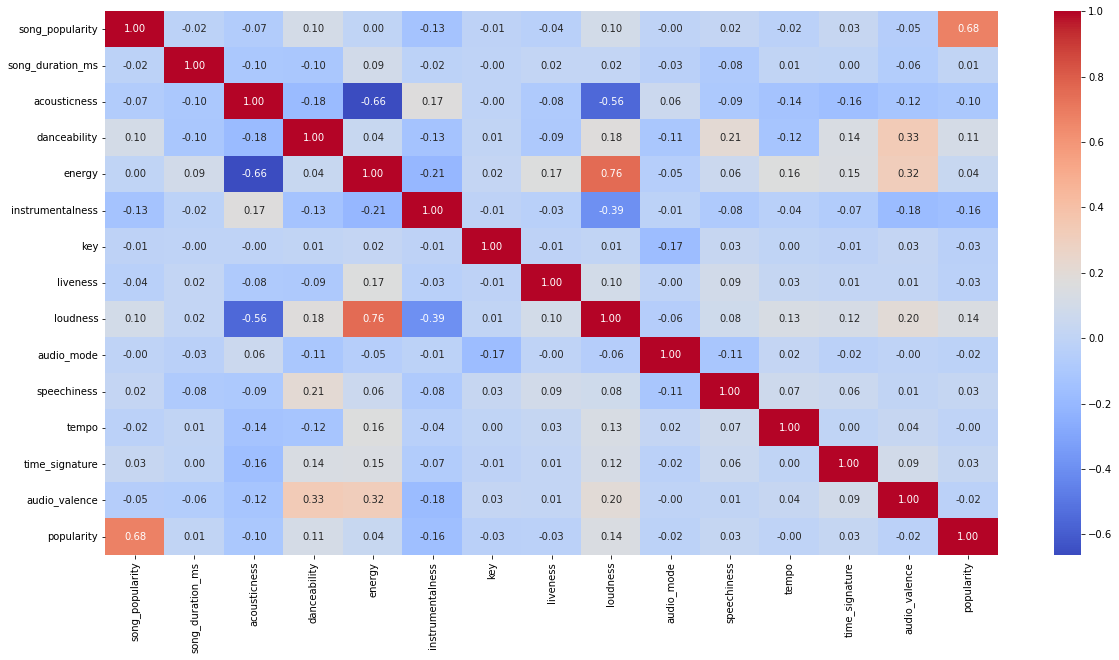

In [56]:
# With annotation
plt.figure(figsize=(20,10))
# Displaying graph
sns.heatmap(spotify.corr(), cmap='coolwarm', annot=True, fmt='.2f')


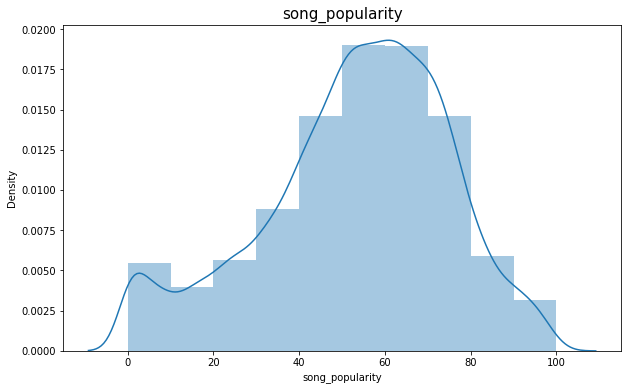

In [13]:
# SongPopularity is the target feature

plt.figure(figsize=(10,6))
plt.title("song_popularity", fontsize=15)
sns.distplot(spotify['song_popularity'], bins=10)

If we count popular songs as falling above 75, we can see visually that they will represent about a fraction of the total spotify library. Duh.  15% will be considered popular.

In [14]:
spotify.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


- Checked popularity rating of songs that have been popular in the last 10 years in Spotify and took the mean value of them (66.5).  But for this study I will consider those with a value of at least 75 as counting among the popular songs.  According to this value, the songs has above this rating could remain on the top lists for a long time. If song_popularity is higher than 75 (this is about 15% percent of data) we labeled it "1" and if is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

In [15]:
# Distinguishing songs popular vs not popular based on song_popularity of 69 = 75 percentile
# 4810/18835 = 25.5% of the titles can be considered popular
# added a feature called 'popularity'

spotify["popularity"]= [ 1 if i>=69 else 0 for i in spotify.song_popularity ]
spotify["popularity"].value_counts()

0    14025
1     4810
Name: popularity, dtype: int64

In [16]:
#popular songs' data

popular=spotify[spotify["popularity"]==1]
popular.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,4810.00000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.0
mean,78.25052,218996.596050,0.207509,0.663877,0.659254,0.018166,5.123285,0.173475,-6.511325,0.613514,0.107150,120.856579,3.972557,0.517530,1.0
std,7.76009,48028.885557,0.240750,0.147162,0.182687,0.100254,3.656602,0.136750,2.959701,0.486995,0.101772,27.472955,0.256493,0.229166,0.0
min,69.00000,67000.000000,0.000018,0.072200,0.002890,0.000000,0.000000,0.021500,-34.255000,0.000000,0.022400,60.048000,1.000000,0.035200,1.0
25%,72.00000,190417.500000,0.027525,0.568000,0.544000,0.000000,1.000000,0.091925,-7.719000,0.000000,0.039400,98.970000,4.000000,0.333000,1.0
50%,76.00000,212696.000000,0.107000,0.673000,0.678000,0.000000,5.000000,0.121000,-5.931000,1.000000,0.060000,119.945000,4.000000,0.508000,1.0
75%,83.00000,240706.000000,0.297000,0.767000,0.799000,0.000092,8.000000,0.203000,-4.599250,1.000000,0.134000,139.755000,4.000000,0.690000,1.0
max,100.00000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.000000,0.978000,-0.739000,1.000000,0.733000,205.999000,5.000000,0.980000,1.0


In [17]:
popular["popularity"].value_counts()

1    4810
Name: popularity, dtype: int64

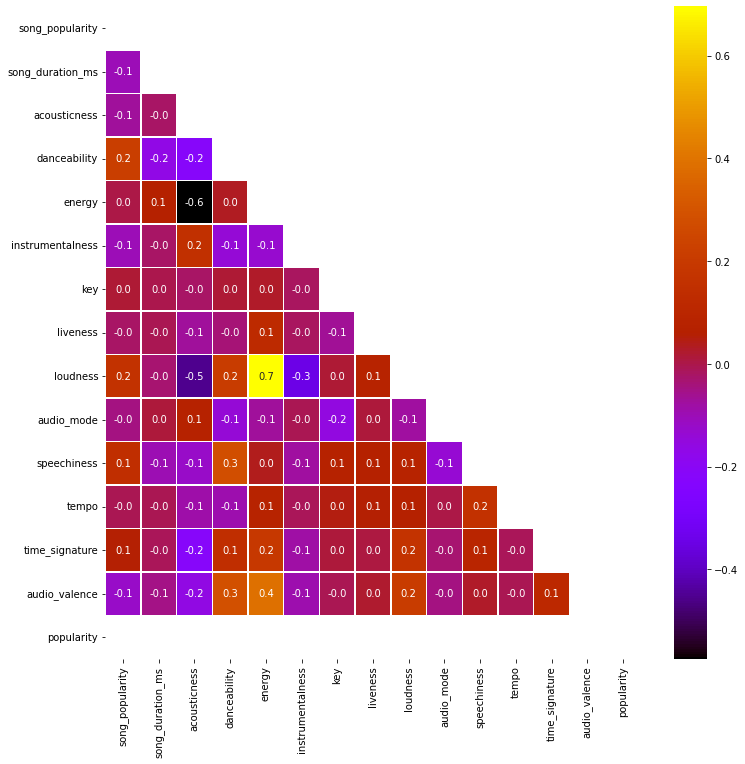

In [18]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(popular.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(popular.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="gnuplot",mask=mask)
plt.show() 

Loudness and energy are highly corrrelated in the popular dataset. 

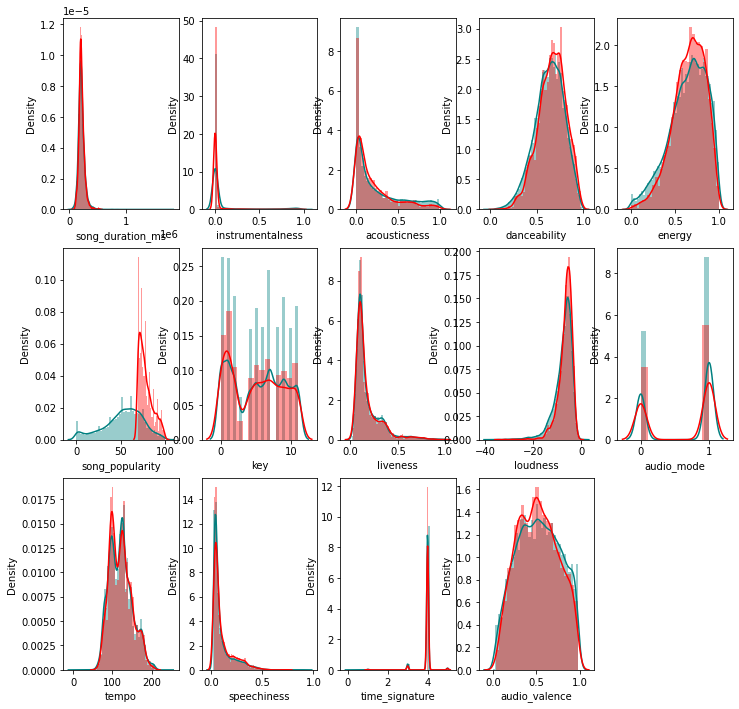

In [19]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( spotify["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( spotify["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( spotify["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( spotify["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( spotify["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( spotify["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( spotify["key"] , color="teal", ax=axes[1, 1])
sns.distplot( spotify["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( spotify["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( spotify["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( spotify["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( spotify["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( spotify["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( spotify["audio_valence"] , color="teal", ax=axes[2, 3])
sns.distplot( popular["song_duration_ms"] , color="red", ax=axes[0, 0])
sns.distplot( popular["instrumentalness"] , color="red", ax=axes[0, 1])
sns.distplot( popular["acousticness"] , color="red", ax=axes[0, 2])
sns.distplot( popular["danceability"] , color="red", ax=axes[0, 3])
sns.distplot( popular["energy"] , color="red", ax=axes[0, 4])
sns.distplot( popular["song_popularity"] , color="red", ax=axes[1, 0])
sns.distplot( popular["key"] , color="red", ax=axes[1, 1])
sns.distplot( popular["liveness"] , color="red", ax=axes[1, 2])
sns.distplot( popular["loudness"] , color="red", ax=axes[1, 3])
sns.distplot( popular["audio_mode"] , color="red", ax=axes[1, 4])
sns.distplot( popular["tempo"] , color="red", ax=axes[2, 0])
sns.distplot( popular["speechiness"] , color="red", ax=axes[2, 1])
sns.distplot( popular["time_signature"] , color="red", ax=axes[2, 2])
sns.distplot( popular["audio_valence"] , color="red", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

**It** The popular songs occur with more concentration or intensity in some features like energy, loudness and danceabiblity. They tend to be short songs and less speechy.  I think we can begin to include these features in the model.


**Step 1 Answer**

This will be a logistical regression problem.  y = 'song_popularity' I won't need 'audio_mode', 'song_name' and 'artist'. The features I will use for the prediction will need to be regularized.  There are no null values.

**Step 2** 

Are there any requirements your data must meet to use the ML model(s) you listed in Step 1?  For example, if you plan to use a logistic regression model, you must have a categorical target.  If you wish to use natural language processing, you'll need a large amount of text data.


**Step 2 Answer**

I will need to use a scaler to regularize the data.  

**Step 3** 

Using visualizations or summary data, show that the requirements you listed in Step 2 are met by your data.  Feel free to add code blocks as necessary.


**Step 4**

Explore your data to determine what kind of data cleaning or wrangling will be necessary before you run your ML model. 

Here are some questions to consider:
* How many observations does your data set have?  18835
* How many features does your data set have?  15
* Does your data have any missing values?  no missing values
* If your data has missing values, will you drop the records or impute the missing data?  What will your imputation strategy be? N/A for this reason
* Does your data have any outliers or unusual values?  If so, how will you handle them? 
* Will you need to do any feature engineering or drop any features from your data?  I will drop 'audio_mode', 'song_popularity', 'song_name', 'key' and 'time_signature'
* Will you need to encode any categorical data or standardize or normalize quantitative features?  I will standardize the remaining features
* Will you need to split your data into traning and testing sets?
* Will you need to do any preprocessing of text data?

If you aren’t sure how to answer any of these questions, your instructor can give you guidance and suggestions.



In [20]:
sorted_df = spotify.sort_values('song_popularity', ascending = False).head(100)
sorted_df.head(25)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
7568,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
15091,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
17392,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
14176,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
11665,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
11697,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
5593,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
4299,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
16497,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1
17590,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671,1


In [21]:
# get the unique values (rows) and assign to spoton
spoton=spotify.drop_duplicates()

In [22]:
spoton.shape

(14924, 15)

In [23]:
spoton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14924 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14924 non-null  int64  
 1   song_duration_ms  14924 non-null  int64  
 2   acousticness      14924 non-null  float64
 3   danceability      14924 non-null  float64
 4   energy            14924 non-null  float64
 5   instrumentalness  14924 non-null  float64
 6   key               14924 non-null  int64  
 7   liveness          14924 non-null  float64
 8   loudness          14924 non-null  float64
 9   audio_mode        14924 non-null  int64  
 10  speechiness       14924 non-null  float64
 11  tempo             14924 non-null  float64
 12  time_signature    14924 non-null  int64  
 13  audio_valence     14924 non-null  float64
 14  popularity        14924 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 1.8 MB


In [24]:
# Outliers beyond 99 percentile will be removed

from scipy import stats

def get_outlier_counts(spoton, threshold):
    spoton = spoton.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_df = pd.DataFrame(np.abs(stats.zscore(spoton)), columns=spoton.columns)
    
    # Compare df z_scores to the threshold and return the count of outliers in each column
    return (z_score_df > threshold_z_score).sum(axis=0)

In [25]:
get_outlier_counts(spoton, 0.99999999999)

song_popularity      0
song_duration_ms    16
acousticness         0
danceability         0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             5
audio_mode           0
speechiness         19
tempo                0
time_signature      70
audio_valence        0
popularity           0
dtype: int64

In [26]:
# define outlier threshold

def remove_outliers(spoton, threshold):
    spoton = spoton.copy()
    
    # Get the z-score for specified threshold
    threshold_z_score = stats.norm.ppf(threshold)
    
    # Get the z-scores for each value in df
    z_score_spoton = pd.DataFrame(np.abs(stats.zscore(spoton)), columns=spoton.columns)
    z_score_spoton = z_score_spoton > threshold_z_score
    
    # Get indices of the outliers
    outliers = z_score_spoton.sum(axis=1)
    outliers = outliers > 0
    outlier_indices = spoton.index[outliers]
    
    # Drop outlier examples
    spoton = spoton.drop(outlier_indices, axis=0).reset_index(drop=True)
    
    return spoton

In [27]:
# Outliers beyond the threshold .95 are removed

def preprocess_inputs(df, outliers=True, threshold=0.95):
    spoton = spoton.copy()
    
    # Remove outliers if specified
    if outliers == False:
        spoton = remove_outliers(spoton, threshold)

In [28]:
spoton.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14924 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   14924 non-null  int64  
 1   song_duration_ms  14924 non-null  int64  
 2   acousticness      14924 non-null  float64
 3   danceability      14924 non-null  float64
 4   energy            14924 non-null  float64
 5   instrumentalness  14924 non-null  float64
 6   key               14924 non-null  int64  
 7   liveness          14924 non-null  float64
 8   loudness          14924 non-null  float64
 9   audio_mode        14924 non-null  int64  
 10  speechiness       14924 non-null  float64
 11  tempo             14924 non-null  float64
 12  time_signature    14924 non-null  int64  
 13  audio_valence     14924 non-null  float64
 14  popularity        14924 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 1.8 MB


In [29]:
#Step 4 Answer:

#Use this space to explore your data in Step 4.

**Step 4 Answer**

Write your answer to any relevant questions from Step 4 here.

**At this point, it is possible that you will discover that you can't answer your research question with your data set.  Work with your instructor to either modify your research question, select a backup research question, or select a new data set. To complete this task successfully, you will need to have selected a research question, have a data set that can be used to answer it, AND have performed EDA.**

### Task 4: Develop a Project Plan 

Now you are ready to plan out everything that will be in your final project slide deck.  


**Step 1** 

Write about one paragraph of background to give your audience some context for your research question.  What motivated you to ask this specific research question?  What is the real world application?  Think about your stakeholder(s) and what that person would want to know about the topic before you got started.

**Step 1 Answer**

Write your answer for  Step 1 here.

We encountered a spotify data set earlier during our program and it made me wonder if I could play around with it to see if I can make certain predictions as to which songs I would end up liking even before actually listening to it. It would be wonderful to learn about new artists based on their songs that are similar to the ones I like.  However, I felt it would be good to begin with a slightly different question to work on which is what makes a song popular.

**Step 2** 

Write one or two paragraphs describing your data set.  What was the source of the data?   Why did you choose to use this particular data set?  Did you experience any challenges with accessing or loading the data?  Describe any data wrangling you need to do to run your ML model.

**Step 2 Answer**

Write your answer for Step 2 here.

This is a data set of 18835 songs taken from ../input/19000-spotify-songs. Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on . duration_ms: The duration of the track in milliseconds.

This a bigger dataset than the previous one I found.  The bigger dataset and change of question from favorite to popular was an attempt to see if ML can be done without overfitting which is what happened with the first attempt I had with a different research question.

**Step 3**

Write one paragraph describing the model or models you plan to use.  Why did you pick this model or models?  How will they answer your research question?  What metrics will you use to evaluate the model performance?  

**Step 3 Answer**

Write your answer for Step 3 here.

I will use a logistical regression model to determine whether the selected features do a good job of predicting whether a song will be popular.  I will be using .score to then measure this and compare it training set with test set

**Step 4**

Think about your intended audience.  How will you communicate your results to your stakeholders?  What data storytelling techniques will you use in your presentation to engage your audience?

**Step 4 Answer**

Write your answer for Step 4 here.

Powerpoint for now using some of the visuals generated from python.  I intend to make it short and easy to digest.

##Task 5: Data Wrangling

Use the following code block (feel free to add more) to do any data wrangling.  It may be helpful to refer to the questions you answered previously in the Exploratory Data Analysis section.  For reference, they are:

Here are some questions to consider:

* How many observations does your data set have?
* How many features does your data set have?
* Does your data have any missing values?
* If your data has missing values, will you drop the records or impute the * missing data? What will your imputation strategy be?
* Does your data have any outliers or unusual values? If so, how will you handle them?
* Will you need to do any feature engineering or drop any features from your data?
* Will you need to encode any categorical data or standardize or normalize quantitative features?
* Will you need to split your data into traning and testing sets?
* Will you need to do any pre-processing of text data?

In [30]:
#Task 5 - Data Wrangling - Use this code block to do any data wrangling.
# Make sure to clearly comment your code.

In [31]:
# song_popularity: Song ratings of spotify audience.  Based on the mean

y = spoton[['popularity']]
X = spoton.drop(['song_popularity', 'popularity'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
X.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [33]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
X_train, X_test, y_train, y_test

(       song_duration_ms  acousticness  danceability    energy  \
 9194          -0.048468     -0.248458      1.267986 -0.329465   
 9603           1.057771      0.256559     -2.081776 -1.757041   
 14751         -0.567066      0.671275     -0.109841  1.044070   
 13793          0.192315      0.089335     -0.305770  0.458628   
 10548         -0.208801      0.584319      0.901408 -1.000471   
 ...                 ...           ...           ...       ...   
 5658          -1.030008     -0.822706     -0.590184  0.192928   
 16418         -1.067472     -0.904840     -2.227143  0.769363   
 5863          -0.707628      1.370273     -2.321948 -1.549885   
 917            0.772539     -0.851134     -0.451137 -0.671723   
 8123          -0.299012      0.313416     -0.501700 -1.734524   
 
        instrumentalness       key  liveness  loudness  audio_mode  \
 9194          -0.384638  1.306763  1.186537 -0.752741   -1.305479   
 9603          -0.384331 -0.928908 -0.200630 -1.279274    0.766002

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.25, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Random Forest trained.


In [35]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Logistic Regression: 84.08%
K-Nearest Neighbors: 81.88%
Support Vector Machine (Linear Kernel): 84.08%
Support Vector Machine (RBF Kernel): 84.08%
Random Forest: 83.78%


#  From my initial accuracy scores which were very low I had the need to go back to the engineering and pre=processing portion of the process.  I had found that I failed to remove the features "popular" and "Popularity" from the X features.  With the adjustments were made I subjected the X_train, y_train data to a series of models and Logistic Regression returned the highest accuracy score at 84.08.

In [36]:
probs_ = model.predict_proba(X_train)
probs = pd.DataFrame(probs_)
probs.head()

,0,1
0,0.940,0.060
1,0.890,0.110
2,0.920,0.080
3,0.905,0.095
4,0.980,0.020


In [37]:
classes_ = model.predict(X_train)
classes = pd.DataFrame(classes_)
classes.head()

,0
0,0
1,0
2,0
3,0
4,0


In [38]:
confusion_matrix(y_train, classes)

array([[9396,    9],
       [  39, 1749]])

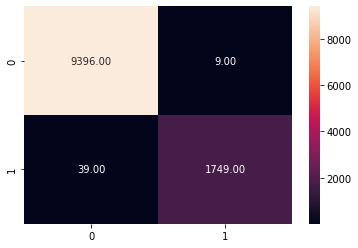

In [39]:
sns.heatmap(confusion_matrix(y_train, classes), annot=True, fmt='.2f')

In [40]:
print(precision_score(y_train, classes))
print(recall_score(y_train,classes))

0.9948805460750854
0.9781879194630873


The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’. The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

In [41]:
#   import f1_score and run f1_score(y_true, y_pred, average=None)

from sklearn.metrics import f1_score

f1_score=f1_score(y_train, classes, average=None)

print('The F1 Score is ', f1_score)


The F1 Score is  [0.99745223 0.98646362]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

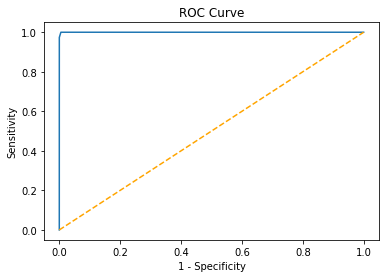

In [42]:
fpr_, tpr_, thresholds_ = roc_curve(y_train, probs[1])



### Write your code above this line.  Leave the remainder of the code block the same

fpr = pd.DataFrame(fpr_)
fpr.rename({0: 'fpr'}, axis=1, inplace=True)

tpr = pd.DataFrame(tpr_)
tpr.rename({0: 'tpr'}, axis=1, inplace=True)

thresholds = pd.DataFrame(thresholds_)
thresholds.rename({0: 'thresholds'}, axis=1, inplace=True)

roc_plot = pd.concat([fpr, tpr, thresholds], axis=1)

plt.plot('fpr', 'tpr', data=roc_plot)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

plt.savefig("ROC.png")
files.download("ROC.png") 


##Task 6: Modeling

Use the following code block to build your ML model.  

In [43]:
pipe = Pipeline([
('scaler', StandardScaler()),
('log_reg', LogisticRegression(random_state=0))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(random_state=0))])

In [44]:
print('The training accuracy is', pipe.score(X_train,y_train))

The training accuracy is 0.8402573036719378


In [45]:
scores = cross_val_score(pipe, X_train, y_train, cv=5)
print(scores.mean())


0.8401680183249176


In [46]:
pipe.fit(X_test, y_test)
print(('The test set accuracy is', pipe.score(X_test,y_test)))

('The test set accuracy is', 0.8405253283302064)


##Task 7: Evaluation

Use the following code block to evaluate your ML model.  

Learning.  I appreciate that the power of my tools have limits and I can only accomplish so much with the time I have available

In [47]:
#Task 7 - Evaluation - Use this code block to evaluate your ML model.
# Make sure to clearly comment your code.

##Task 8: Results

Use the following text block to summarize your results.  How will you communicate the answer to your research question to stakeholders? 

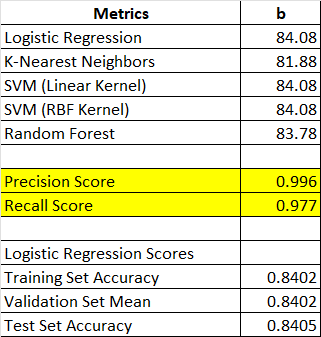

**Task 8 Answer**

The initial accuracy scores are really low in the training and validation sets.  I will now try to include as many of the features as possible.

But after dropping the unnecessary features from X (i.e. 'song+popularity', 'popular', 'song_name') and intuitively seelcting Random Forest as the model to further work on,  I ended up with the following accuracy scores:

Random Forest Training Accuracy =  .961
Random Forest Validation        =  .953
Random Forest Test Accuracy     =  .961 

#Part 2: Presentation 



##Task 1: Slide Deck

Create and present a slide deck to your classmates showing how you answered your research question.  You can find a Slide Template in the course materials or create your own.  The presentation should be about five minutes long.

##Task 2: Reflection

Use the following text block to reflect on the project.  Did you run into anything that was particularly difficult?  What part(s) of the project did you enjoy most?  Did your results leave you with any new questions you'd investigate if you had more time?

**Task 2 Answer** 

Write your answer to Task 5 here.

Gradient Boost fitting is taking a while.

This exercise has taught me that it takes more than getting the code to run to executing a reasonably viable ML Model and understanding everything that is happening under the hood.

Even with a good dataset with no nulls and very little data wrangling necessary,  to the point one would intuit confidence that it would be easy to get excellent accuracy scores, is no guarantee that that would be the case.

Pros:  Data set was probably AI generated, Access to previous ML activity codes and overwhelming help available on the internet

Cons:  My lack of experience.  

Moving forward.  I would like to subject the same dataset to another round of ML modeling and also do an AAR/forensic of my previous attempts to determine how I could have done better.

Furthermore, I would take a position that has me working with a senior or mentor to gain the necessary experience and wisdom I need to master this craft.